# 📊 Most Demanded Skills for Data Roles

## 🛠 Methodology

1. **Clean up skills column**  
2. **Calculate skill count based on job titles**  
3. **Calculate skill percentage**  
4. **Visualize final findings**  

In [2]:
#Importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading data
dataset= load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning 
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\LENOVO\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_VN = df[
    (df['job_country'] == 'Vietnam') & 
    (df['job_title_short'].isin(['Business Analyst', 'Data Analyst', 'Senior Data Analyst']))
]

In [4]:
df_skills = df_VN.explode('job_skills')
# df_skills[['job_title_short','job_skills']]
df_skills_group = df_skills.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count').sort_values(by='skill_count',ascending=False)
df_skills_group

,job_skills,job_title_short,skill_count
170,sql,Data Analyst,157
38,excel,Data Analyst,99
125,python,Data Analyst,97
115,power bi,Data Analyst,83
179,tableau,Data Analyst,74
...,...,...,...
183,terminal,Business Analyst,1
192,vue,Senior Data Analyst,1
191,vue,Business Analyst,1
190,visio,Data Analyst,1


In [5]:
job_titles = ['Business Analyst', 'Data Analyst', 'Senior Data Analyst']

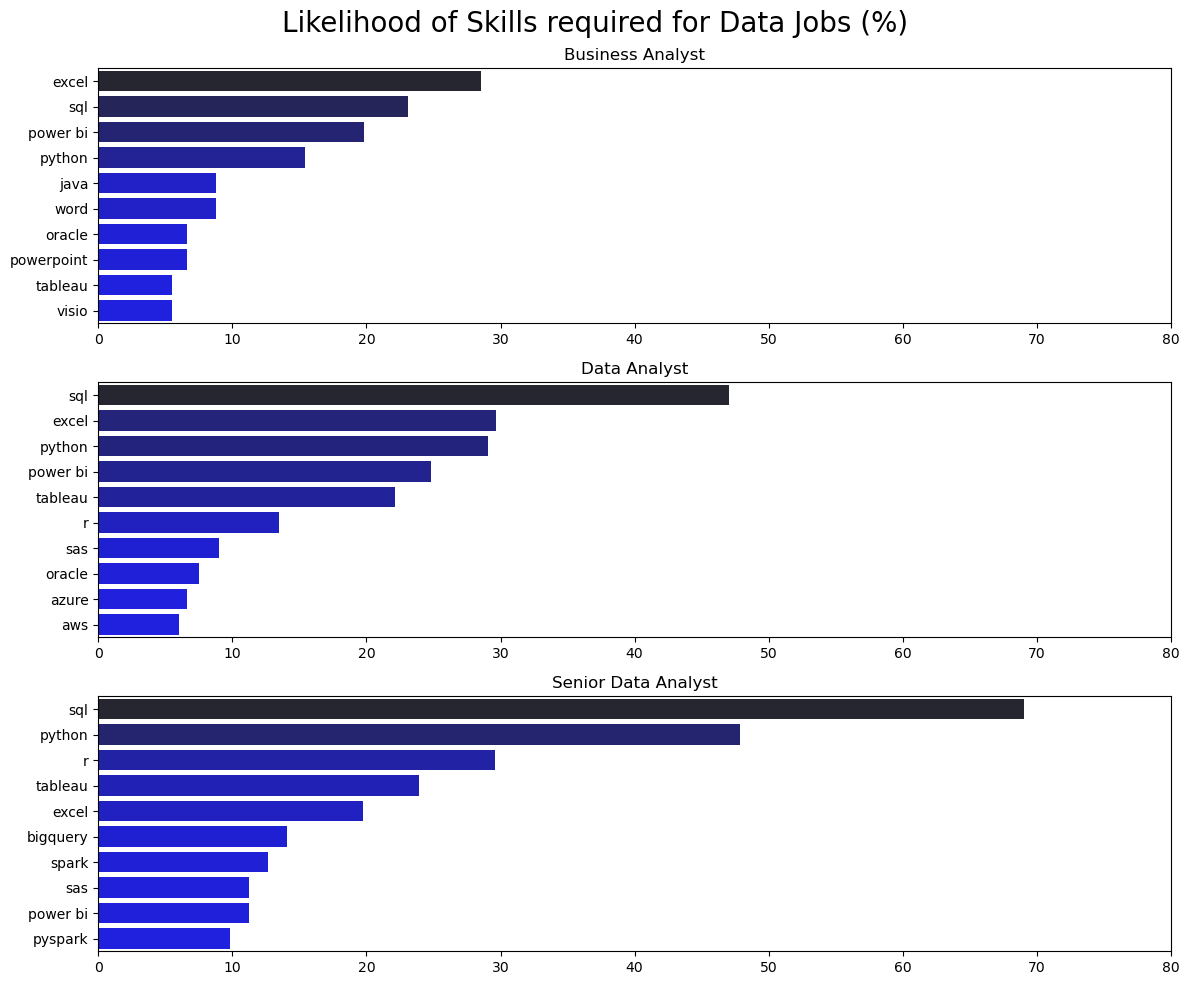

In [9]:
fig,ax = plt.subplots(3,1)

for i,job in enumerate(job_titles):
    df_plot = df_pct[df_pct['job_title_short']==job].head(10)
    # df_plot.plot(kind='barh',x='job_skills', y='skill_count',ax=ax[i],title=job, hue='job_skills',palette='light:b')
    sns.barplot(data=df_plot,x='skill_pct', y='job_skills',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,80)
    ax[i].set_title(job)
  
fig.suptitle('Likelihood of Skills required for Data Jobs (%)', fontsize=20)
fig.set_size_inches(12,10)
fig.tight_layout()

In [7]:
#%skill in a job posting = (skill_count)/(total count of job postings)
df_job_title_count = df_VN['job_title_short'].value_counts().reset_index(name='total_jobs')

In [8]:
df_pct = pd.merge(df_skills_group, df_job_title_count, how='left', on='job_title_short' )
df_pct['skill_pct'] = df_pct['skill_count']/df_pct['total_jobs']*100
df_pct

,job_skills,job_title_short,skill_count,total_jobs,skill_pct
0,sql,Data Analyst,157,334,47.005988
1,excel,Data Analyst,99,334,29.640719
2,python,Data Analyst,97,334,29.041916
3,power bi,Data Analyst,83,334,24.850299
4,tableau,Data Analyst,74,334,22.155689
...,...,...,...,...,...
193,terminal,Business Analyst,1,91,1.098901
194,vue,Senior Data Analyst,1,71,1.408451
195,vue,Business Analyst,1,91,1.098901
196,visio,Data Analyst,1,334,0.299401
